Showing preview for: HELLO - Sequence 0


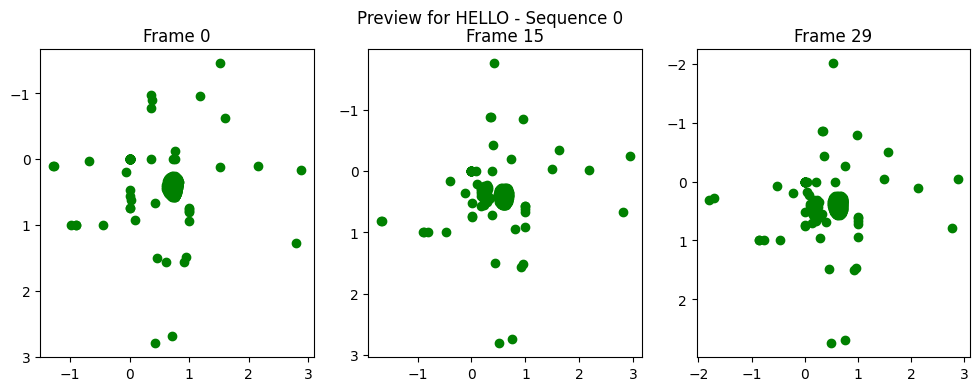

In [2]:
# ---------------------------------------------
# SCRIPT: verify_data.ipynb
# PURPOSE: Preview captured sequences for any action and sequence number
# ---------------------------------------------

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define base dataset path
DATA_PATH = os.path.join('MP_Data')

# Define actions list to match dataset
actions = [
    'hello', 'iloveyou', 'please', 'thankyou', 'ok',
    'excuseme', 'sorry', 'welcome', 'stop', 'goodbye'
]

# Function to preview frames from a sequence
def preview_sequence(action, sequence_id):
    print(f"Showing preview for: {action.upper()} - Sequence {sequence_id}")
    folder_path = os.path.join(DATA_PATH, action, str(sequence_id))
    if not os.path.exists(folder_path):
        print("❌ Sequence not found.")
        return

    frame_paths = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')])
    if not frame_paths:
        print("⚠️ No frames found.")
        return

    # Pick 3 frames to preview: first, middle, last
    selected_indices = [0, len(frame_paths) // 2, len(frame_paths) - 1]
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for i, idx in enumerate(selected_indices):
        data = np.load(frame_paths[idx])
        reshaped = data.reshape(-1, 3)[:, :2]  # drop z-dim or visibility if present
        axes[i].scatter(reshaped[:, 0], reshaped[:, 1], c='green')
        axes[i].invert_yaxis()
        axes[i].set_title(f'Frame {idx}')
    plt.suptitle(f"Preview for {action.upper()} - Sequence {sequence_id}")
    plt.show()

# Example usage (change values below to test):
preview_sequence("hello", 0)